# MRS observations with the etalon filters
In this notebook we show the entirety of the available etalon observations.  
  
Notebook creation date: 22nd December 2017  
Author: Ioannis Argyriou (Institute of Astronomy, KUL)  
Email: ioannis.argyriou@kuleuven.be

## > Import modules

In [1]:
from distortionMaps import d2cMapping
import mrs_aux as maux
import funcs
from ivs.timeseries import pergrams

import csv
import numpy as np
import scipy.interpolate as scp_interpolate
from astropy.io import fits
from matplotlib import pyplot as plt
%matplotlib notebook

import warnings
warnings.simplefilter('ignore')

## > Get data

In [2]:
# Define paths to data
workDir  = '/Users/ioannisa/Desktop/python/miri_devel/'
cdpDir   = workDir+'cdp_data/'
lvl2path = workDir+'/FM_data/LVL2/'
MRSWaveCalDir = workDir+'MRSWaveCal/'

# Get data
#> Etalon FM observations
sci_imgs_ET1A = {"1A":lvl2path +'FM1T00010937/MIRFM1T00010937_1_495_SE_2011-05-19T22h24m06_LVL2.fits',
            "1B":lvl2path +'FM1T00010939/MIRFM1T00010939_1_495_SE_2011-05-20T00h04m44_LVL2.fits', 
            "1C":lvl2path +'FM1T00010843/MIRFM1T00010843_1_495_SE_2011-05-18T00h47m06_LVL2.fits', 
            "2A":lvl2path +'FM1T00010937/MIRFM1T00010937_1_495_SE_2011-05-19T22h24m06_LVL2.fits', 
            "2B":lvl2path +'FM1T00010939/MIRFM1T00010939_1_495_SE_2011-05-20T00h04m44_LVL2.fits', 
            "2C":lvl2path +'FM1T00010843/MIRFM1T00010843_1_495_SE_2011-05-18T00h47m06_LVL2.fits', 
            "3A":lvl2path +'FM1T00010937/MIRFM1T00010937_1_494_SE_2011-05-19T22h23m43_LVL2.fits', 
            "3B":lvl2path +'FM1T00010939/MIRFM1T00010939_1_494_SE_2011-05-20T00h04m21_LVL2.fits', 
            "3C":lvl2path +'FM1T00010843/MIRFM1T00010843_1_494_SE_2011-05-18T00h46m35_LVL2.fits', 
            "4A":lvl2path +'FM1T00010937/MIRFM1T00010937_1_494_SE_2011-05-19T22h23m43_LVL2.fits', 
            "4B":lvl2path +'FM1T00010939/MIRFM1T00010939_1_494_SE_2011-05-20T00h04m21_LVL2.fits', 
            "4C":lvl2path +'FM1T00010843/MIRFM1T00010843_1_494_SE_2011-05-18T00h46m35_LVL2.fits'}

bkg_imgs_ET1A = {"1A":lvl2path +'FM1T00010938/MIRFM1T00010938_1_495_SE_2011-05-19T23h16m52_LVL2.fits', 
            "1B":lvl2path +'FM1T00010940/MIRFM1T00010940_1_495_SE_2011-05-20T00h53m40_LVL2.fits', 
            "1C":lvl2path +'FM1T00010844/MIRFM1T00010844_1_495_SE_2011-05-18T01h53m59_LVL2.fits', 
            "2A":lvl2path +'FM1T00010938/MIRFM1T00010938_1_495_SE_2011-05-19T23h16m52_LVL2.fits', 
            "2B":lvl2path +'FM1T00010940/MIRFM1T00010940_1_495_SE_2011-05-20T00h53m40_LVL2.fits', 
            "2C":lvl2path +'FM1T00010844/MIRFM1T00010844_1_495_SE_2011-05-18T01h53m59_LVL2.fits', 
            "3A":lvl2path +'FM1T00010938/MIRFM1T00010938_1_494_SE_2011-05-19T23h16m30_LVL2.fits', 
            "3B":lvl2path +'FM1T00010940/MIRFM1T00010940_1_494_SE_2011-05-20T00h53m17_LVL2.fits', 
            "3C":lvl2path +'FM1T00010844/MIRFM1T00010844_1_494_SE_2011-05-18T01h53m27_LVL2.fits', 
            "4A":lvl2path +'FM1T00010938/MIRFM1T00010938_1_494_SE_2011-05-19T23h16m30_LVL2.fits', 
            "4B":lvl2path +'FM1T00010940/MIRFM1T00010940_1_494_SE_2011-05-20T00h53m17_LVL2.fits', 
            "4C":lvl2path +'FM1T00010844/MIRFM1T00010844_1_494_SE_2011-05-18T01h53m27_LVL2.fits'}

sci_imgs_ET1B = {"1A":lvl2path +'FM1T00010918/MIRFM1T00010918_1_495_SE_2011-05-19T15h17m35_LVL2.fits',
            "1B":lvl2path +'FM1T00010920/MIRFM1T00010920_1_495_SE_2011-05-19T16h52m14_LVL2.fits', 
            "1C":lvl2path +'FM1T00010943/MIRFM1T00010943_1_495_SE_2011-05-20T03h23m04_LVL2.fits', 
            "2A":lvl2path +'FM1T00010918/MIRFM1T00010918_1_495_SE_2011-05-19T15h17m35_LVL2.fits', 
            "2B":lvl2path +'FM1T00010920/MIRFM1T00010920_1_495_SE_2011-05-19T16h52m14_LVL2.fits', 
            "2C":lvl2path +'FM1T00010943/MIRFM1T00010943_1_495_SE_2011-05-20T03h23m04_LVL2.fits', 
            "3A":lvl2path +'FM1T00010918/MIRFM1T00010918_1_494_SE_2011-05-19T15h17m12_LVL2.fits', 
            "3B":lvl2path +'FM1T00010920/MIRFM1T00010920_1_494_SE_2011-05-19T16h51m50_LVL2.fits', 
            "3C":lvl2path +'FM1T00010943/MIRFM1T00010943_1_494_SE_2011-05-20T03h22m41_LVL2.fits', 
            "4A":lvl2path +'FM1T00010918/MIRFM1T00010918_1_494_SE_2011-05-19T15h17m12_LVL2.fits', 
            "4B":lvl2path +'FM1T00010920/MIRFM1T00010920_1_494_SE_2011-05-19T16h51m50_LVL2.fits', 
            "4C":lvl2path +'FM1T00010943/MIRFM1T00010943_1_494_SE_2011-05-20T03h22m41_LVL2.fits'}

bkg_imgs_ET1B = {"1A":lvl2path +'FM1T00010919/MIRFM1T00010919_1_495_SE_2011-05-19T16h04m35_LVL2.fits', 
            "1B":lvl2path +'FM1T00010921/MIRFM1T00010921_1_495_SE_2011-05-19T17h38m33_LVL2.fits', 
            "1C":lvl2path +'FM1T00010942/MIRFM1T00010942_1_495_SE_2011-05-20T02h30m42_LVL2.fits', 
            "2A":lvl2path +'FM1T00010919/MIRFM1T00010919_1_495_SE_2011-05-19T16h04m35_LVL2.fits', 
            "2B":lvl2path +'FM1T00010921/MIRFM1T00010921_1_495_SE_2011-05-19T17h38m33_LVL2.fits', 
            "2C":lvl2path +'FM1T00010942/MIRFM1T00010942_1_495_SE_2011-05-20T02h30m42_LVL2.fits', 
            "3A":lvl2path +'FM1T00010919/MIRFM1T00010919_1_494_SE_2011-05-19T16h04m13_LVL2.fits', 
            "3B":lvl2path +'FM1T00010921/MIRFM1T00010921_1_494_SE_2011-05-19T17h38m10_LVL2.fits', 
            "3C":lvl2path +'FM1T00010942/MIRFM1T00010942_1_494_SE_2011-05-20T02h30m20_LVL2.fits', 
            "4A":lvl2path +'FM1T00010919/MIRFM1T00010919_1_494_SE_2011-05-19T16h04m13_LVL2.fits', 
            "4B":lvl2path +'FM1T00010921/MIRFM1T00010921_1_494_SE_2011-05-19T17h38m10_LVL2.fits', 
            "4C":lvl2path +'FM1T00010942/MIRFM1T00010942_1_494_SE_2011-05-20T02h30m20_LVL2.fits'}

sci_imgs_ET2A = {"1A":lvl2path +'FM1T00010912/MIRFM1T00010912_1_495_SE_2011-05-19T09h52m51_LVL2.fits',
            "1B":lvl2path +'FM1T00010914/MIRFM1T00010914_1_495_SE_2011-05-19T12h06m04_LVL2.fits', 
            "1C":lvl2path +'FM1T00010916/MIRFM1T00010916_1_495_SE_2011-05-19T13h40m32_LVL2.fits', 
            "2A":lvl2path +'FM1T00010912/MIRFM1T00010912_1_495_SE_2011-05-19T09h52m51_LVL2.fits', 
            "2B":lvl2path +'FM1T00010914/MIRFM1T00010914_1_495_SE_2011-05-19T12h06m04_LVL2.fits', 
            "2C":lvl2path +'FM1T00010916/MIRFM1T00010916_1_495_SE_2011-05-19T13h40m32_LVL2.fits', 
            "3A":lvl2path +'FM1T00010912/MIRFM1T00010912_1_494_SE_2011-05-19T09h52m28_LVL2.fits', 
            "3B":lvl2path +'FM1T00010914/MIRFM1T00010914_1_494_SE_2011-05-19T12h05m42_LVL2.fits', 
            "3C":lvl2path +'FM1T00010916/MIRFM1T00010916_1_494_SE_2011-05-19T13h40m09_LVL2.fits', 
            "4A":lvl2path +'FM1T00010912/MIRFM1T00010912_1_494_SE_2011-05-19T09h52m28_LVL2.fits', 
            "4B":lvl2path +'FM1T00010914/MIRFM1T00010914_1_494_SE_2011-05-19T12h05m42_LVL2.fits', 
            "4C":lvl2path +'FM1T00010916/MIRFM1T00010916_1_494_SE_2011-05-19T13h40m09_LVL2.fits'}

bkg_imgs_ET2A = {"1A":lvl2path +'FM1T00010913/MIRFM1T00010913_1_495_SE_2011-05-19T11h07m18_LVL2.fits', 
            "1B":lvl2path +'FM1T00010915/MIRFM1T00010915_1_495_SE_2011-05-19T12h52m36_LVL2.fits', 
            "1C":lvl2path +'FM1T00010917/MIRFM1T00010917_1_495_SE_2011-05-19T14h28m24_LVL2.fits', 
            "2A":lvl2path +'FM1T00010913/MIRFM1T00010913_1_495_SE_2011-05-19T11h07m18_LVL2.fits', 
            "2B":lvl2path +'FM1T00010915/MIRFM1T00010915_1_495_SE_2011-05-19T12h52m36_LVL2.fits', 
            "2C":lvl2path +'FM1T00010917/MIRFM1T00010917_1_495_SE_2011-05-19T14h28m24_LVL2.fits', 
            "3A":lvl2path +'FM1T00010913/MIRFM1T00010913_1_494_SE_2011-05-19T11h06m56_LVL2.fits', 
            "3B":lvl2path +'FM1T00010915/MIRFM1T00010915_1_494_SE_2011-05-19T12h52m13_LVL2.fits', 
            "3C":lvl2path +'FM1T00010917/MIRFM1T00010917_1_494_SE_2011-05-19T14h28m01_LVL2.fits', 
            "4A":lvl2path +'FM1T00010913/MIRFM1T00010913_1_494_SE_2011-05-19T11h06m56_LVL2.fits', 
            "4B":lvl2path +'FM1T00010915/MIRFM1T00010915_1_494_SE_2011-05-19T12h52m13_LVL2.fits', 
            "4C":lvl2path +'FM1T00010917/MIRFM1T00010917_1_494_SE_2011-05-19T14h28m01_LVL2.fits'}

sci_imgs_ET2B = {"1A":lvl2path +'FM1T00010963/MIRFM1T00010963_1_495_SE_2011-05-20T23h07m01_LVL2.fits',
            "1B":lvl2path +'FM1T00010952/MIRFM1T00010952_1_495_SE_2011-05-20T11h03m18_LVL2.fits', 
            "1C":lvl2path +'FM1T00010954/MIRFM1T00010954_1_495_SE_2011-05-20T12h38m33_LVL2.fits', 
            "2A":lvl2path +'FM1T00010963/MIRFM1T00010963_1_495_SE_2011-05-20T23h07m01_LVL2.fits', 
            "2B":lvl2path +'FM1T00010952/MIRFM1T00010952_1_495_SE_2011-05-20T11h03m18_LVL2.fits', 
            "2C":lvl2path +'FM1T00010954/MIRFM1T00010954_1_495_SE_2011-05-20T12h38m33_LVL2.fits', 
            "3A":lvl2path +'FM1T00010963/MIRFM1T00010963_1_494_SE_2011-05-20T23h06m39_LVL2.fits', 
            "3B":lvl2path +'FM1T00010952/MIRFM1T00010952_1_494_SE_2011-05-20T11h02m55_LVL2.fits', 
            "3C":lvl2path +'FM1T00010954/MIRFM1T00010954_1_494_SE_2011-05-20T12h38m09_LVL2.fits', 
            "4A":lvl2path +'FM1T00010963/MIRFM1T00010963_1_494_SE_2011-05-20T23h06m39_LVL2.fits', 
            "4B":lvl2path +'FM1T00010952/MIRFM1T00010952_1_494_SE_2011-05-20T11h02m55_LVL2.fits', 
            "4C":lvl2path +'FM1T00010954/MIRFM1T00010954_1_494_SE_2011-05-20T12h38m09_LVL2.fits'}

bkg_imgs_ET2B = {"1A":lvl2path +'FM1T00010964/MIRFM1T00010964_1_495_SE_2011-05-21T00h03m53_LVL2.fits', 
            "1B":lvl2path +'FM1T00010953/MIRFM1T00010953_1_495_SE_2011-05-20T11h50m14_LVL2.fits', 
            "1C":lvl2path +'FM1T00010955/MIRFM1T00010955_1_495_SE_2011-05-20T13h25m22_LVL2.fits', 
            "2A":lvl2path +'FM1T00010964/MIRFM1T00010964_1_495_SE_2011-05-21T00h03m53_LVL2.fits', 
            "2B":lvl2path +'FM1T00010953/MIRFM1T00010953_1_495_SE_2011-05-20T11h50m14_LVL2.fits', 
            "2C":lvl2path +'FM1T00010955/MIRFM1T00010955_1_495_SE_2011-05-20T13h25m22_LVL2.fits', 
            "3A":lvl2path +'FM1T00010964/MIRFM1T00010964_1_494_SE_2011-05-21T00h03m30_LVL2.fits', 
            "3B":lvl2path +'FM1T00010953/MIRFM1T00010953_1_494_SE_2011-05-20T11h49m51_LVL2.fits', 
            "3C":lvl2path +'FM1T00010955/MIRFM1T00010955_1_494_SE_2011-05-20T13h24m59_LVL2.fits', 
            "4A":lvl2path +'FM1T00010964/MIRFM1T00010964_1_494_SE_2011-05-21T00h03m30_LVL2.fits', 
            "4B":lvl2path +'FM1T00010953/MIRFM1T00010953_1_494_SE_2011-05-20T11h49m51_LVL2.fits', 
            "4C":lvl2path +'FM1T00010955/MIRFM1T00010955_1_494_SE_2011-05-20T13h24m59_LVL2.fits'}

sci_imgs_800Kext = {"1A":lvl2path +'FM1T00011282/MIRFM1T00011282_1_495_SE_2011-05-31T02h15m32_LVL2.fits',
            "1B":lvl2path +'FM1T00011283/MIRFM1T00011283_1_495_SE_2011-05-31T03h12m30_LVL2.fits', 
            "1C":lvl2path +'FM1T00011284/MIRFM1T00011284_1_495_SE_2011-05-31T04h09m25_LVL2.fits', 
            "2A":lvl2path +'FM1T00011282/MIRFM1T00011282_1_495_SE_2011-05-31T02h15m32_LVL2.fits', 
            "2B":lvl2path +'FM1T00011283/MIRFM1T00011283_1_495_SE_2011-05-31T03h12m30_LVL2.fits', 
            "2C":lvl2path +'FM1T00011284/MIRFM1T00011284_1_495_SE_2011-05-31T04h09m25_LVL2.fits', 
            "3A":lvl2path +'FM1T00011282/MIRFM1T00011282_1_494_SE_2011-05-31T02h15m02_LVL2.fits', 
            "3B":lvl2path +'FM1T00011283/MIRFM1T00011283_1_494_SE_2011-05-31T03h11m59_LVL2.fits', 
            "3C":lvl2path +'FM1T00011284/MIRFM1T00011284_1_494_SE_2011-05-31T04h08m55_LVL2.fits', 
            "4A":lvl2path +'FM1T00011282/MIRFM1T00011282_1_494_SE_2011-05-31T02h15m02_LVL2.fits', 
            "4B":lvl2path +'FM1T00011283/MIRFM1T00011283_1_494_SE_2011-05-31T03h11m59_LVL2.fits', 
            "4C":lvl2path +'FM1T00011284/MIRFM1T00011284_1_494_SE_2011-05-31T04h08m55_LVL2.fits'}

bkg_imgs_800Kext = {"1A":lvl2path +'FM1T00011285/MIRFM1T00011285_1_495_SE_2011-05-31T05h06m47_LVL2.fits',
            "1B":lvl2path +'FM1T00011286/MIRFM1T00011286_1_495_SE_2011-05-31T06h03m43_LVL2.fits', 
            "1C":lvl2path +'FM1T00011287/MIRFM1T00011287_1_495_SE_2011-05-31T07h00m44_LVL2.fits', 
            "2A":lvl2path +'FM1T00011285/MIRFM1T00011285_1_495_SE_2011-05-31T05h06m47_LVL2.fits', 
            "2B":lvl2path +'FM1T00011286/MIRFM1T00011286_1_495_SE_2011-05-31T06h03m43_LVL2.fits', 
            "2C":lvl2path +'FM1T00011287/MIRFM1T00011287_1_495_SE_2011-05-31T07h00m44_LVL2.fits', 
            "3A":lvl2path +'FM1T00011285/MIRFM1T00011285_1_494_SE_2011-05-31T05h06m17_LVL2.fits', 
            "3B":lvl2path +'FM1T00011286/MIRFM1T00011286_1_494_SE_2011-05-31T06h03m14_LVL2.fits', 
            "3C":lvl2path +'FM1T00011287/MIRFM1T00011287_1_494_SE_2011-05-31T07h00m15_LVL2.fits', 
            "4A":lvl2path +'FM1T00011285/MIRFM1T00011285_1_494_SE_2011-05-31T05h06m17_LVL2.fits', 
            "4B":lvl2path +'FM1T00011286/MIRFM1T00011286_1_494_SE_2011-05-31T06h03m14_LVL2.fits', 
            "4C":lvl2path +'FM1T00011287/MIRFM1T00011287_1_494_SE_2011-05-31T07h00m15_LVL2.fits'}

#> Etalon FTS data
etalon1A_file = MRSWaveCalDir+'MIRI_b_E1av_etalon1A_77K.txt'
wvnrs1A,etalon1A = np.genfromtxt(etalon1A_file, skip_footer = 1, usecols=(0,1), delimiter = '',unpack='True')

etalon1B_file = MRSWaveCalDir+'MIRI_b_G3av_etalon1B_80K.txt'
wvnrs1B,etalon1B = np.genfromtxt(etalon1B_file, skip_footer = 1, usecols=(0,1), delimiter = '',unpack='True')

etalon2A_file = MRSWaveCalDir+'MIRI_b_K1av_etalon2A_80K.txt'
wvnrs2A,etalon2A = np.genfromtxt(etalon2A_file, skip_footer = 1, usecols=(0,1), delimiter = '',unpack='True')

etalon2B_file = MRSWaveCalDir+'MIRI_etalon2B_80K.csv'
wvnrs2B,etalon2B = [],[]
with open(etalon2B_file, 'rb') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',')
    for row in spamreader:
        wvnrs2B.append(np.float(row[0]) )
        etalon2B.append(np.float(row[1]) )
wvnrs2B,etalon2B = np.array(wvnrs2B),np.array(etalon2B)

bands = ['1A','1B','1C','2A','2B','2C','3A','3B','3C','4A','4B','4C']

In [3]:
FTS_pgram = 'False' # compute periodogram of FTS data

In [ ]:
lambdaMaps = {}
for band in ['3B','3C','4A','4B','4C']:
    d2cMaps = d2cMapping(band,cdpDir)
    lambdaMaps[band] = d2cMaps['lambdaMap']

plt.figure(figsize=(12,6))
for band in ['3B','3C','4A','4B','4C']:
    
    sci_img_ET1A = fits.open(sci_imgs_ET1A[band])[0].data[0,:,:]
    sci_img_ET1B = fits.open(sci_imgs_ET1B[band])[0].data[0,:,:]
    sci_img_ET2A = fits.open(sci_imgs_ET2A[band])[0].data[0,:,:]
    sci_img_ET2B = fits.open(sci_imgs_ET2B[band])[0].data[0,:,:]

    bkg_img_ET1A = fits.open(bkg_imgs_ET1A[band])[0].data[0,:,:]
    bkg_img_ET1B = fits.open(bkg_imgs_ET1B[band])[0].data[0,:,:]
    bkg_img_ET2A = fits.open(bkg_imgs_ET2A[band])[0].data[0,:,:]
    bkg_img_ET2B = fits.open(bkg_imgs_ET2B[band])[0].data[0,:,:]
    
    sci_img_800Kext = fits.open(sci_imgs_800Kext[band])[0].data[0,:,:]
    bkg_img_800Kext = fits.open(bkg_imgs_800Kext[band])[0].data[0,:,:]

    if band[0] == '4':
        plt.plot(lambdaMaps[band][:,414],sci_img_ET1A[:,414])
        plt.plot(lambdaMaps[band][:,414],sci_img_800Kext[:,414])
    elif band[0] == '3':
        plt.plot(lambdaMaps[band][:,530],sci_img_ET1A[:,530])
        plt.plot(lambdaMaps[band][:,530],sci_img_800Kext[:,530])
    # plt.plot(sci_img_ET1B[:,414])
    # plt.plot(sci_img_ET2A[:,414])
    # plt.plot(sci_img_ET2B[:,414])

    if band[0] == '4':
        plt.plot(lambdaMaps[band][:,414],bkg_img_ET1A[:,414])
        plt.plot(lambdaMaps[band][:,414],bkg_img_800Kext[:,414])
    elif band[0] == '3':
        plt.plot(lambdaMaps[band][:,530],bkg_img_ET1A[:,530])
        plt.plot(lambdaMaps[band][:,530],bkg_img_800Kext[:,530])
    # plt.plot(bkg_img_ET1B[:,414])
    # plt.plot(bkg_img_ET2A[:,414])
    # plt.plot(bkg_img_ET2B[:,414])
plt.tight_layout()

## > Transform data

In [4]:
wvnrDic_ET1A, signalDic_ET1A, fringe_pattern, freqsDic_ET1A, powerDic_ET1A, freqsDic_ET1A_FTS, powerDic_ET1A_FTS = {},{},{},{},{},{},{}
for band in bands:
    # ET_1A
    print "Band {}".format(band)
    # Get extended source observation
    sci_file = sci_imgs_ET1A[band]
    bkg_file = bkg_imgs_ET1A[band]
    reduced_img = fits.open(sci_file)[0].data[0,:,:]#-fits.open(bkg_file)[0].data[0,:,:]
    
    # Get distortion maps
    #> detector dimensions in pixels
    det_dims = (1024,1032)
    # compute coordinate maps for spectral band
    d2cMaps = d2cMapping(band,cdpDir)
    # extract single maps
    sliceMap  = d2cMaps['sliceMap']
    alphaMap  = d2cMaps['alphaMap']
    betaMap   = d2cMaps['betaMap']
    lambdaMap = d2cMaps['lambdaMap']
    wvnrMap   = 10000./lambdaMap
    nslices   = maux.MRS_nslices[band[0]]
    bzero     = d2cMaps['bzero']
    bdel      = d2cMaps['bdel']
    mrs_fwhm  = maux.MRS_FWHM[band[0]]
    dimension = 'wavenumber' # wavelength
    
    if (dimension == 'wavenumber') & (band[0] in ['1','2']):
        reduced_img = np.flipud(reduced_img)
        wvnrMap   = np.flipud(wvnrMap)
        sliceMap  = np.flipud(sliceMap)
        alphaMap  = np.flipud(alphaMap)
        betaMap   = np.flipud(betaMap)
        
    fringe_file,photom_file,psf_file,resol_file = funcs.get_cdps(cdpDir=cdpDir,band=band)
    fringe_img     = fits.open(fringe_file)[1].data        # [unitless]
    
    ypos,xpos = funcs.detpixel_trace(band=band,d2cMaps=d2cMaps,sliceID=nslices/2,alpha_pos=0.)
    
    wvnr = np.abs(wvnrMap[ypos,xpos][10:-10])
    arr  = np.abs(reduced_img[ypos,xpos][10:-10])
    
    sel = (wvnrs1A>=min(wvnr)) & (wvnrs1A<=max(wvnr))
    wvnr_FTS = wvnrs1A[sel]
    arr_FTS = etalon1A[sel]
    
    # lomb-scargle periodogram
    freqs, pgram = pergrams.scargle(wvnr, arr, norm='density')
    
    wvnrDic_ET1A[band]   = wvnrMap[ypos,xpos]
    signalDic_ET1A[band] = reduced_img[ypos,xpos]
    fringe_pattern[band] = fringe_img[ypos,xpos]
    freqsDic_ET1A[band]  = freqs.copy()
    powerDic_ET1A[band]  = pgram.copy()
    
    if FTS_pgram == 'True':
        freqs_FTS, pgram_FTS = pergrams.scargle(wvnr_FTS, arr_FTS, norm='density')
        freqsDic_ET1A_FTS[band] = freqs_FTS.copy()
        powerDic_ET1A_FTS[band] = pgram_FTS.copy()

Band 1A
Band 1B
Band 1C
Band 2A
Band 2B
Band 2C
Band 3A
Band 3B
Band 3C
Band 4A
Band 4B
Band 4C


In [6]:
# ET_1B
wvnrDic_ET1B, signalDic_ET1B, freqsDic_ET1B, powerDic_ET1B, freqsDic_ET1B_FTS, powerDic_ET1B_FTS = {},{},{},{},{},{}
for band in bands:
    print "Band {}".format(band)
    # Get extended source observation
    sci_file = sci_imgs_ET1B[band]
    bkg_file = bkg_imgs_ET1B[band]
    reduced_img = fits.open(sci_file)[0].data[0,:,:]-fits.open(bkg_file)[0].data[0,:,:]
    
    # Get distortion maps
    #> detector dimensions in pixels
    det_dims = (1024,1032)
    # compute coordinate maps for spectral band
    d2cMaps = d2cMapping(band,cdpDir)
    # extract single maps
    sliceMap  = d2cMaps['sliceMap']
    alphaMap  = d2cMaps['alphaMap']
    betaMap   = d2cMaps['betaMap']
    lambdaMap = d2cMaps['lambdaMap']
    wvnrMap   = 10000./lambdaMap
    nslices   = maux.MRS_nslices[band[0]]
    bzero     = d2cMaps['bzero']
    bdel      = d2cMaps['bdel']
    mrs_fwhm  = maux.MRS_FWHM[band[0]]
    dimension = 'wavenumber' # wavelength
    
    if (dimension == 'wavenumber') & (band[0] in ['1','2']):
        reduced_img = np.flipud(reduced_img)
        wvnrMap   = np.flipud(wvnrMap)
        sliceMap  = np.flipud(sliceMap)
        alphaMap  = np.flipud(alphaMap)
        betaMap   = np.flipud(betaMap)
        
    ypos,xpos = funcs.detpixel_trace(band=band,d2cMaps=d2cMaps,sliceID=nslices/2,alpha_pos=0.)
    
    wvnr = np.abs(wvnrMap[ypos,xpos][20:-20])
    arr  = np.abs(reduced_img[ypos,xpos][20:-20])
    
    sel = (wvnrs1B>=min(wvnr)) & (wvnrs1B<=max(wvnr))
    wvnr_FTS = wvnrs1B[sel]
    arr_FTS = etalon1B[sel]
    
    # lomb-scargle periodogram
    freqs, pgram = pergrams.scargle(wvnr, arr, norm='density')
    
    wvnrDic_ET1B[band]   = wvnrMap[ypos,xpos]
    signalDic_ET1B[band] = reduced_img[ypos,xpos]
    freqsDic_ET1B[band]  = freqs.copy()
    powerDic_ET1B[band] = pgram.copy()

    if FTS_pgram == 'True':
        freqs_FTS, pgram_FTS = pergrams.scargle(wvnr_FTS, arr_FTS, norm='density')
        freqsDic_ET1B_FTS[band] = freqs_FTS.copy()
        powerDic_ET1B_FTS[band] = pgram_FTS.copy()

Band 1A
Band 1B
Band 1C
Band 2A
Band 2B
Band 2C
Band 3A
Band 3B
Band 3C
Band 4A
Band 4B
Band 4C


In [39]:
wvnrDic_ET2A, signalDic_ET2A, freqsDic_ET2A, powerDic_ET2A, freqsDic_ET2A_FTS, powerDic_ET2A_FTS = {},{},{},{},{},{}
for band in bands:
    # ET_2A
    print "Band {}".format(band)
    # Get extended source observation
    sci_file = sci_imgs_ET2A[band]
    bkg_file = bkg_imgs_ET2A[band]
    reduced_img = fits.open(sci_file)[0].data[0,:,:]-fits.open(bkg_file)[0].data[0,:,:]
    
    # Get distortion maps
    #> detector dimensions in pixels
    det_dims = (1024,1032)
    # compute coordinate maps for spectral band
    d2cMaps = d2cMapping(band,cdpDir)
    # extract single maps
    sliceMap  = d2cMaps['sliceMap']
    alphaMap  = d2cMaps['alphaMap']
    betaMap   = d2cMaps['betaMap']
    lambdaMap = d2cMaps['lambdaMap']
    wvnrMap   = 10000./lambdaMap
    nslices   = maux.MRS_nslices[band[0]]
    bzero     = d2cMaps['bzero']
    bdel      = d2cMaps['bdel']
    mrs_fwhm  = maux.MRS_FWHM[band[0]]
    dimension = 'wavenumber' # wavelength
    
    if (dimension == 'wavenumber') & (band[0] in ['1','2']):
        reduced_img = np.flipud(reduced_img)
        wvnrMap   = np.flipud(wvnrMap)
        sliceMap  = np.flipud(sliceMap)
        alphaMap  = np.flipud(alphaMap)
        betaMap   = np.flipud(betaMap)
        
    islice    = nslices/2           # slice number (equivalent to beta position)
    alpha_pos = 0.                  # along-slice position, [arcsec]
    # take pixel trace along specified slice, specified alpha position
    ypos,xpos = np.arange(det_dims[0]),np.zeros(det_dims[0]) # initialize placeholders
    slice_img,alpha_img = [np.full(det_dims,0.) for j in range(2)] # initialize placeholders
    sel_pix = (sliceMap == 100*int(band[0])+islice) # select pixels with correct slice number
    slice_img[sel_pix] = sliceMap[sel_pix] # image containing single slice
    alpha_img[sel_pix] = alphaMap[sel_pix] # image containing alpha positions in single slice
    
    # trace is built by taking the pixel in every detector row with alpha value closest to the one specified
    for i in ypos:
        if band[0] in ['1','4']:
            xpos[i] = np.argmin(alpha_img[i,:])+funcs.find_nearest(alpha_img[i,:][(slice_img[i,:]!=0)],alpha_pos)
        elif band[0] in ['2','3']:
            xpos[i] = np.argmax(alpha_img[i,:])+funcs.find_nearest(alpha_img[i,:][(slice_img[i,:]!=0)],alpha_pos)
    xpos = xpos.astype(int)
    
    wvnr = np.abs(wvnrMap[ypos,xpos][10:-10])
    arr  = np.abs(reduced_img[ypos,xpos][10:-10])
    
    sel = (wvnrs2A>=min(wvnr)) & (wvnrs2A<=max(wvnr))
    wvnr_FTS = wvnrs2A[sel]
    arr_FTS = etalon2A[sel]
    
    # lomb-scargle periodogram
    freqs, pgram = pergrams.scargle(wvnr, arr, norm='density')
    
    wvnrDic_ET2A[band]   = wvnrMap[ypos,xpos]
    signalDic_ET2A[band] = reduced_img[ypos,xpos]
    freqsDic_ET2A[band]  = freqs.copy()
    powerDic_ET2A[band]  = pgram.copy()

    if FTS_pgram == 'True':
        freqs_FTS, pgram_FTS = pergrams.scargle(wvnr_FTS, arr_FTS, norm='density')
        freqsDic_ET2A_FTS[band] = freqs_FTS.copy()
        powerDic_ET2A_FTS[band] = pgram_FTS.copy()

Band 1A
Band 1B
Band 1C
Band 2A
Band 2B
Band 2C
Band 3A
Band 3B
Band 3C
Band 4A
Band 4B
Band 4C


In [23]:
wvnrDic_ET2B, signalDic_ET2B, freqsDic_ET2B, powerDic_ET2B, freqsDic_ET2B_FTS, powerDic_ET2B_FTS = {},{},{},{},{},{}
for band in bands:
    # ET_2B
    print "Band {}".format(band)
    # Get extended source observation
    sci_file = sci_imgs_ET2B[band]
    bkg_file = bkg_imgs_ET2B[band]
    reduced_img = fits.open(sci_file)[0].data[0,:,:]-fits.open(bkg_file)[0].data[0,:,:]
    
    # Get distortion maps
    #> detector dimensions in pixels
    det_dims = (1024,1032)
    # compute coordinate maps for spectral band
    d2cMaps = d2cMapping(band,cdpDir)
    # extract single maps
    sliceMap  = d2cMaps['sliceMap']
    alphaMap  = d2cMaps['alphaMap']
    betaMap   = d2cMaps['betaMap']
    lambdaMap = d2cMaps['lambdaMap']
    wvnrMap   = 10000./lambdaMap
    nslices   = maux.MRS_nslices[band[0]]
    bzero     = d2cMaps['bzero']
    bdel      = d2cMaps['bdel']
    mrs_fwhm  = maux.MRS_FWHM[band[0]]
    dimension = 'wavenumber' # wavelength
    
    if (dimension == 'wavenumber') & (band[0] in ['1','2']):
        reduced_img = np.flipud(reduced_img)
        wvnrMap   = np.flipud(wvnrMap)
        sliceMap  = np.flipud(sliceMap)
        alphaMap  = np.flipud(alphaMap)
        betaMap   = np.flipud(betaMap)
        
    islice    = nslices/2           # slice number (equivalent to beta position)
    alpha_pos = 0.                  # along-slice position, [arcsec]
    # take pixel trace along specified slice, specified alpha position
    ypos,xpos = np.arange(det_dims[0]),np.zeros(det_dims[0]) # initialize placeholders
    slice_img,alpha_img = [np.full(det_dims,0.) for j in range(2)] # initialize placeholders
    sel_pix = (sliceMap == 100*int(band[0])+islice) # select pixels with correct slice number
    slice_img[sel_pix] = sliceMap[sel_pix] # image containing single slice
    alpha_img[sel_pix] = alphaMap[sel_pix] # image containing alpha positions in single slice
    
    # trace is built by taking the pixel in every detector row with alpha value closest to the one specified
    for i in ypos:
        if band[0] in ['1','4']:
            xpos[i] = np.argmin(alpha_img[i,:])+funcs.find_nearest(alpha_img[i,:][(slice_img[i,:]!=0)],alpha_pos)
        elif band[0] in ['2','3']:
            xpos[i] = np.argmax(alpha_img[i,:])+funcs.find_nearest(alpha_img[i,:][(slice_img[i,:]!=0)],alpha_pos)
    xpos = xpos.astype(int)
    
    wvnr = np.abs(wvnrMap[ypos,xpos][10:-10])
    arr  = np.abs(reduced_img[ypos,xpos][10:-10])
    
    sel = (wvnrs2B>=min(wvnr)) & (wvnrs2B<=max(wvnr))
    wvnr_FTS = wvnrs2B[sel]
    arr_FTS = etalon2B[sel]
    
    # lomb-scargle periodogram
    freqs, pgram = pergrams.scargle(wvnr, arr, norm='density')
    
    wvnrDic_ET2B[band]   = wvnrMap[ypos,xpos]
    signalDic_ET2B[band] = reduced_img[ypos,xpos]
    freqsDic_ET2B[band]  = freqs.copy()
    powerDic_ET2B[band]  = pgram.copy()

    if (FTS_pgram == 'True') & (len(wvnr_FTS)!=0):
        freqs_FTS, pgram_FTS = pergrams.scargle(wvnr_FTS, arr_FTS, norm='density')
        freqsDic_ET2B_FTS[band] = freqs_FTS.copy()
        powerDic_ET2B_FTS[band] = pgram_FTS.copy()

Band 1A
Band 1B
Band 1C
Band 2A
Band 2B
Band 2C
Band 3A
Band 3B
Band 3C
Band 4A
Band 4B
Band 4C


## > Visualization

<IPython.core.display.Javascript object>


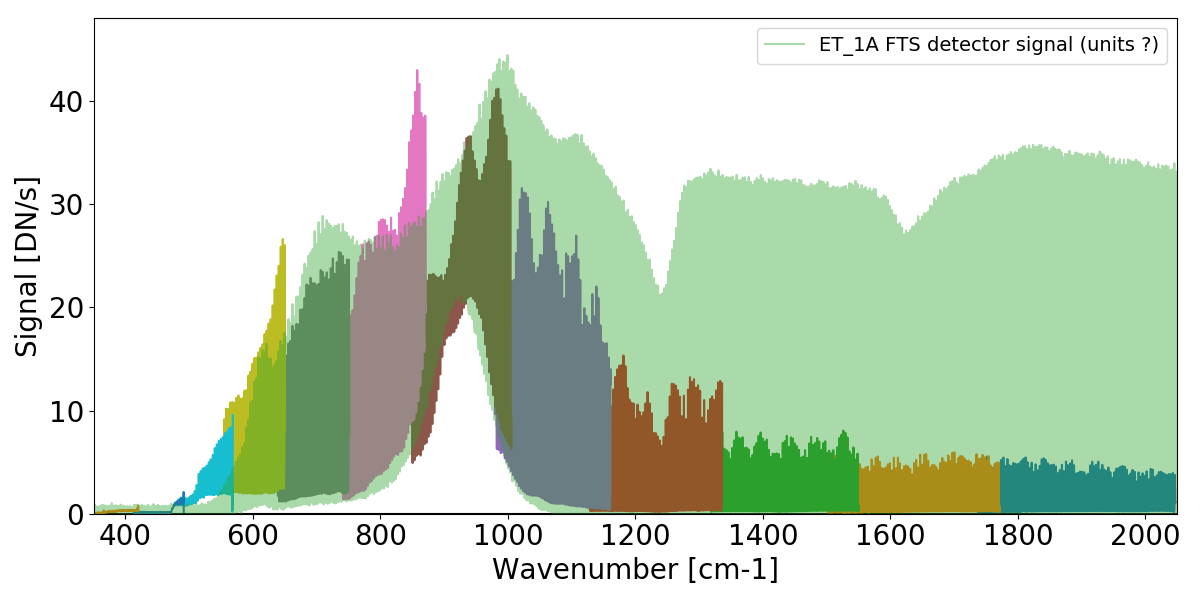

<IPython.core.display.Javascript object>


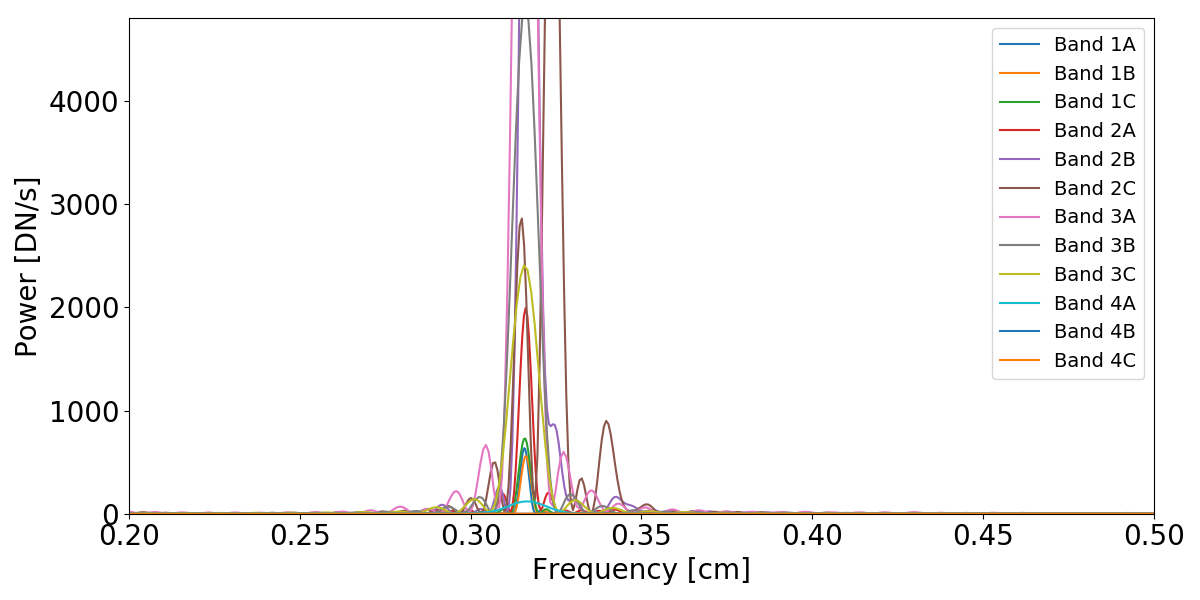

In [5]:
plt.figure(figsize=(12,6))
for band in bands:
    plt.plot(wvnrDic_ET1A[band],signalDic_ET1A[band])
plt.plot(wvnrs1A,etalon1A*800.,alpha=0.4,label='ET_1A FTS detector signal (units ?)')
plt.hlines(0,min(wvnrs1A),max(wvnrs1A))
# plt.vlines(np.arange(1000)*3.1638952246,0,40,zorder=1)
plt.xlim(350,2050)
plt.ylim(0)
plt.xlabel('Wavenumber [cm-1]',fontsize=20)
plt.ylabel('Signal [DN/s]',fontsize=20)
plt.legend(loc='upper right',fontsize=14)
plt.tick_params(axis='both',labelsize=20)
plt.tight_layout()

plt.figure(figsize=(12,6))
for band in bands:
    plt.plot(freqsDic_ET1A[band][freqsDic_ET1A[band]>0],powerDic_ET1A[band][freqsDic_ET1A[band]>0],label='Band {}'.format(band))
plt.xlim(0.2,0.5)
plt.ylim(0,4800)
plt.xlabel('Frequency [cm]',fontsize=20)
plt.ylabel('Power [DN/s]',fontsize=20)
plt.legend(loc='upper right',fontsize=14)
plt.tick_params(axis='both',labelsize=20)
plt.tight_layout()

if FTS_pgram == 'True':
    plt.figure(figsize=(12,6))
    for band in bands:
        plt.plot(freqsDic_ET1A_FTS[band][freqsDic_ET1A_FTS[band]>0],powerDic_ET1A_FTS[band][freqsDic_ET1A_FTS[band]>0],label='Band {}'.format(band))
    plt.xlim(0.3,0.34)
    plt.ylim(0,0.025)
    plt.xlabel('Frequency [cm]',fontsize=20)
    plt.ylabel('Power [DN/s]',fontsize=20)
    plt.legend(loc='upper right',fontsize=14)
    plt.tick_params(axis='both',labelsize=20)
    plt.tight_layout()

<IPython.core.display.Javascript object>


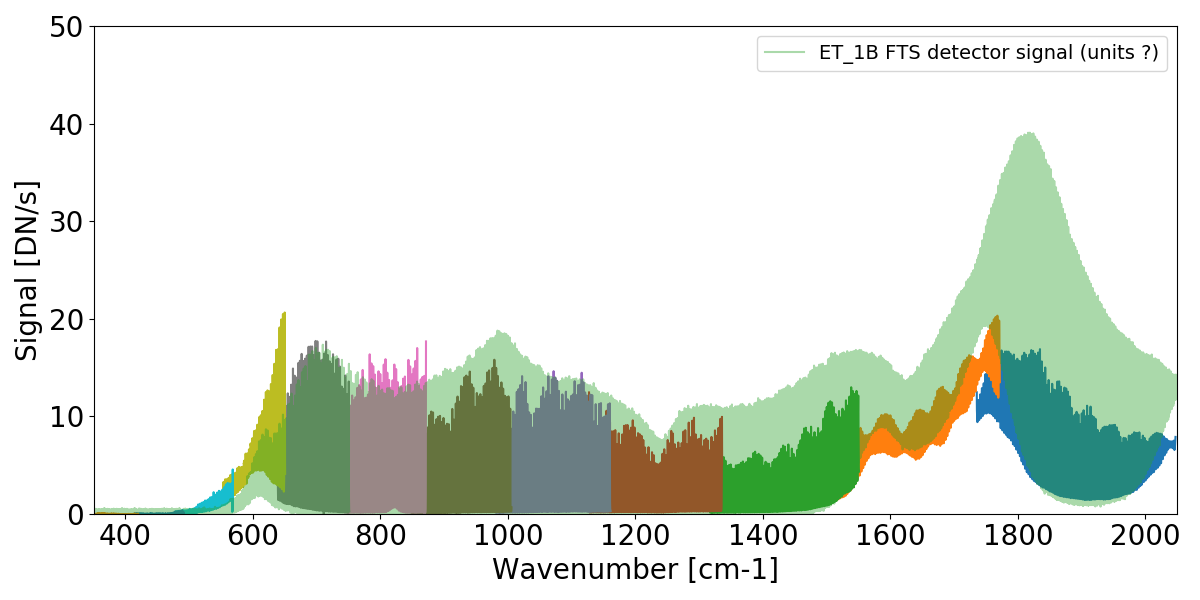

<IPython.core.display.Javascript object>


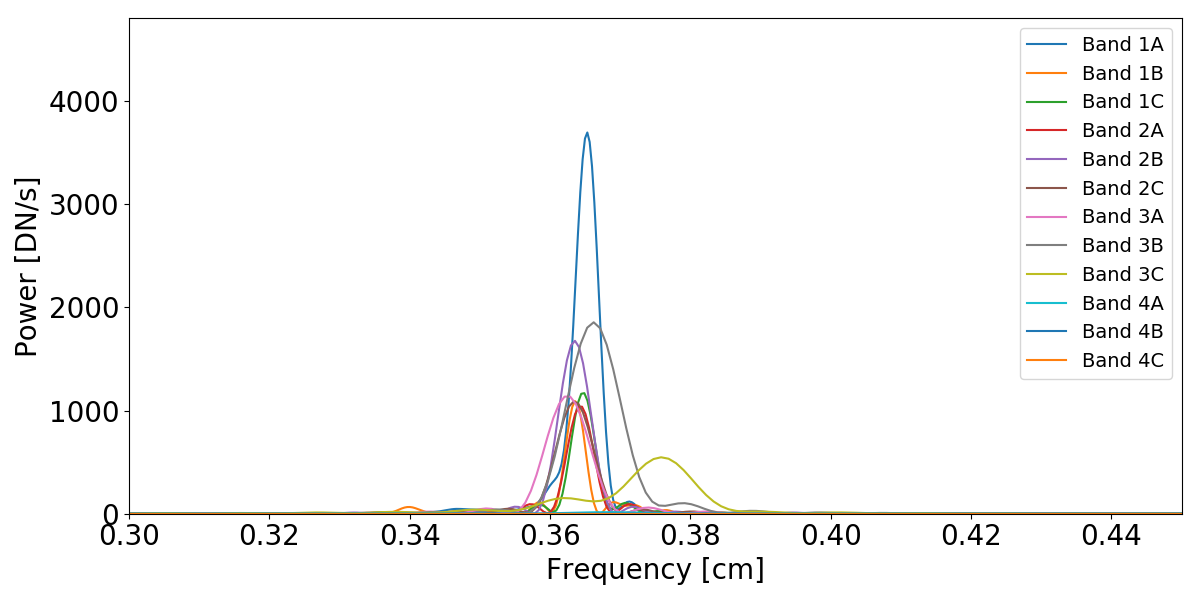

In [8]:
plt.figure(figsize=(12,6))
for band in bands:
    plt.plot(wvnrDic_ET1B[band],signalDic_ET1B[band])
plt.plot(wvnrs1B,etalon1B*600.,alpha=0.4,label='ET_1B FTS detector signal (units ?)')
plt.xlim(350,2050)
plt.ylim(0,50)
plt.xlabel('Wavenumber [cm-1]',fontsize=20)
plt.ylabel('Signal [DN/s]',fontsize=20)
plt.legend(loc='upper right',fontsize=14)
plt.tick_params(axis='both',labelsize=20)
plt.tight_layout()

plt.figure(figsize=(12,6))
for band in bands:
    plt.plot(freqsDic_ET1B[band][freqsDic_ET1B[band]>0],powerDic_ET1B[band][freqsDic_ET1B[band]>0],label='Band {}'.format(band))
plt.xlim(0.3,0.45)
plt.ylim(0,4800)
plt.xlabel('Frequency [cm]',fontsize=20)
plt.ylabel('Power [DN/s]',fontsize=20)
plt.legend(loc='upper right',fontsize=14)
plt.tick_params(axis='both',labelsize=20)
plt.tight_layout()

if FTS_pgram == 'True':
    plt.figure(figsize=(12,6))
    for band in bands:
        plt.plot(freqsDic_ET1B_FTS[band][freqsDic_ET1B_FTS[band]>0],powerDic_ET1B_FTS[band][freqsDic_ET1B_FTS[band]>0],label='Band {}'.format(band))
    plt.xlim(0.3,0.45)
    plt.ylim(0,0.025)
    plt.xlabel('Frequency [cm]',fontsize=20)
    plt.ylabel('Power [DN/s]',fontsize=20)
    plt.legend(loc='upper right',fontsize=14)
    plt.tick_params(axis='both',labelsize=20)
    plt.tight_layout()

<IPython.core.display.Javascript object>


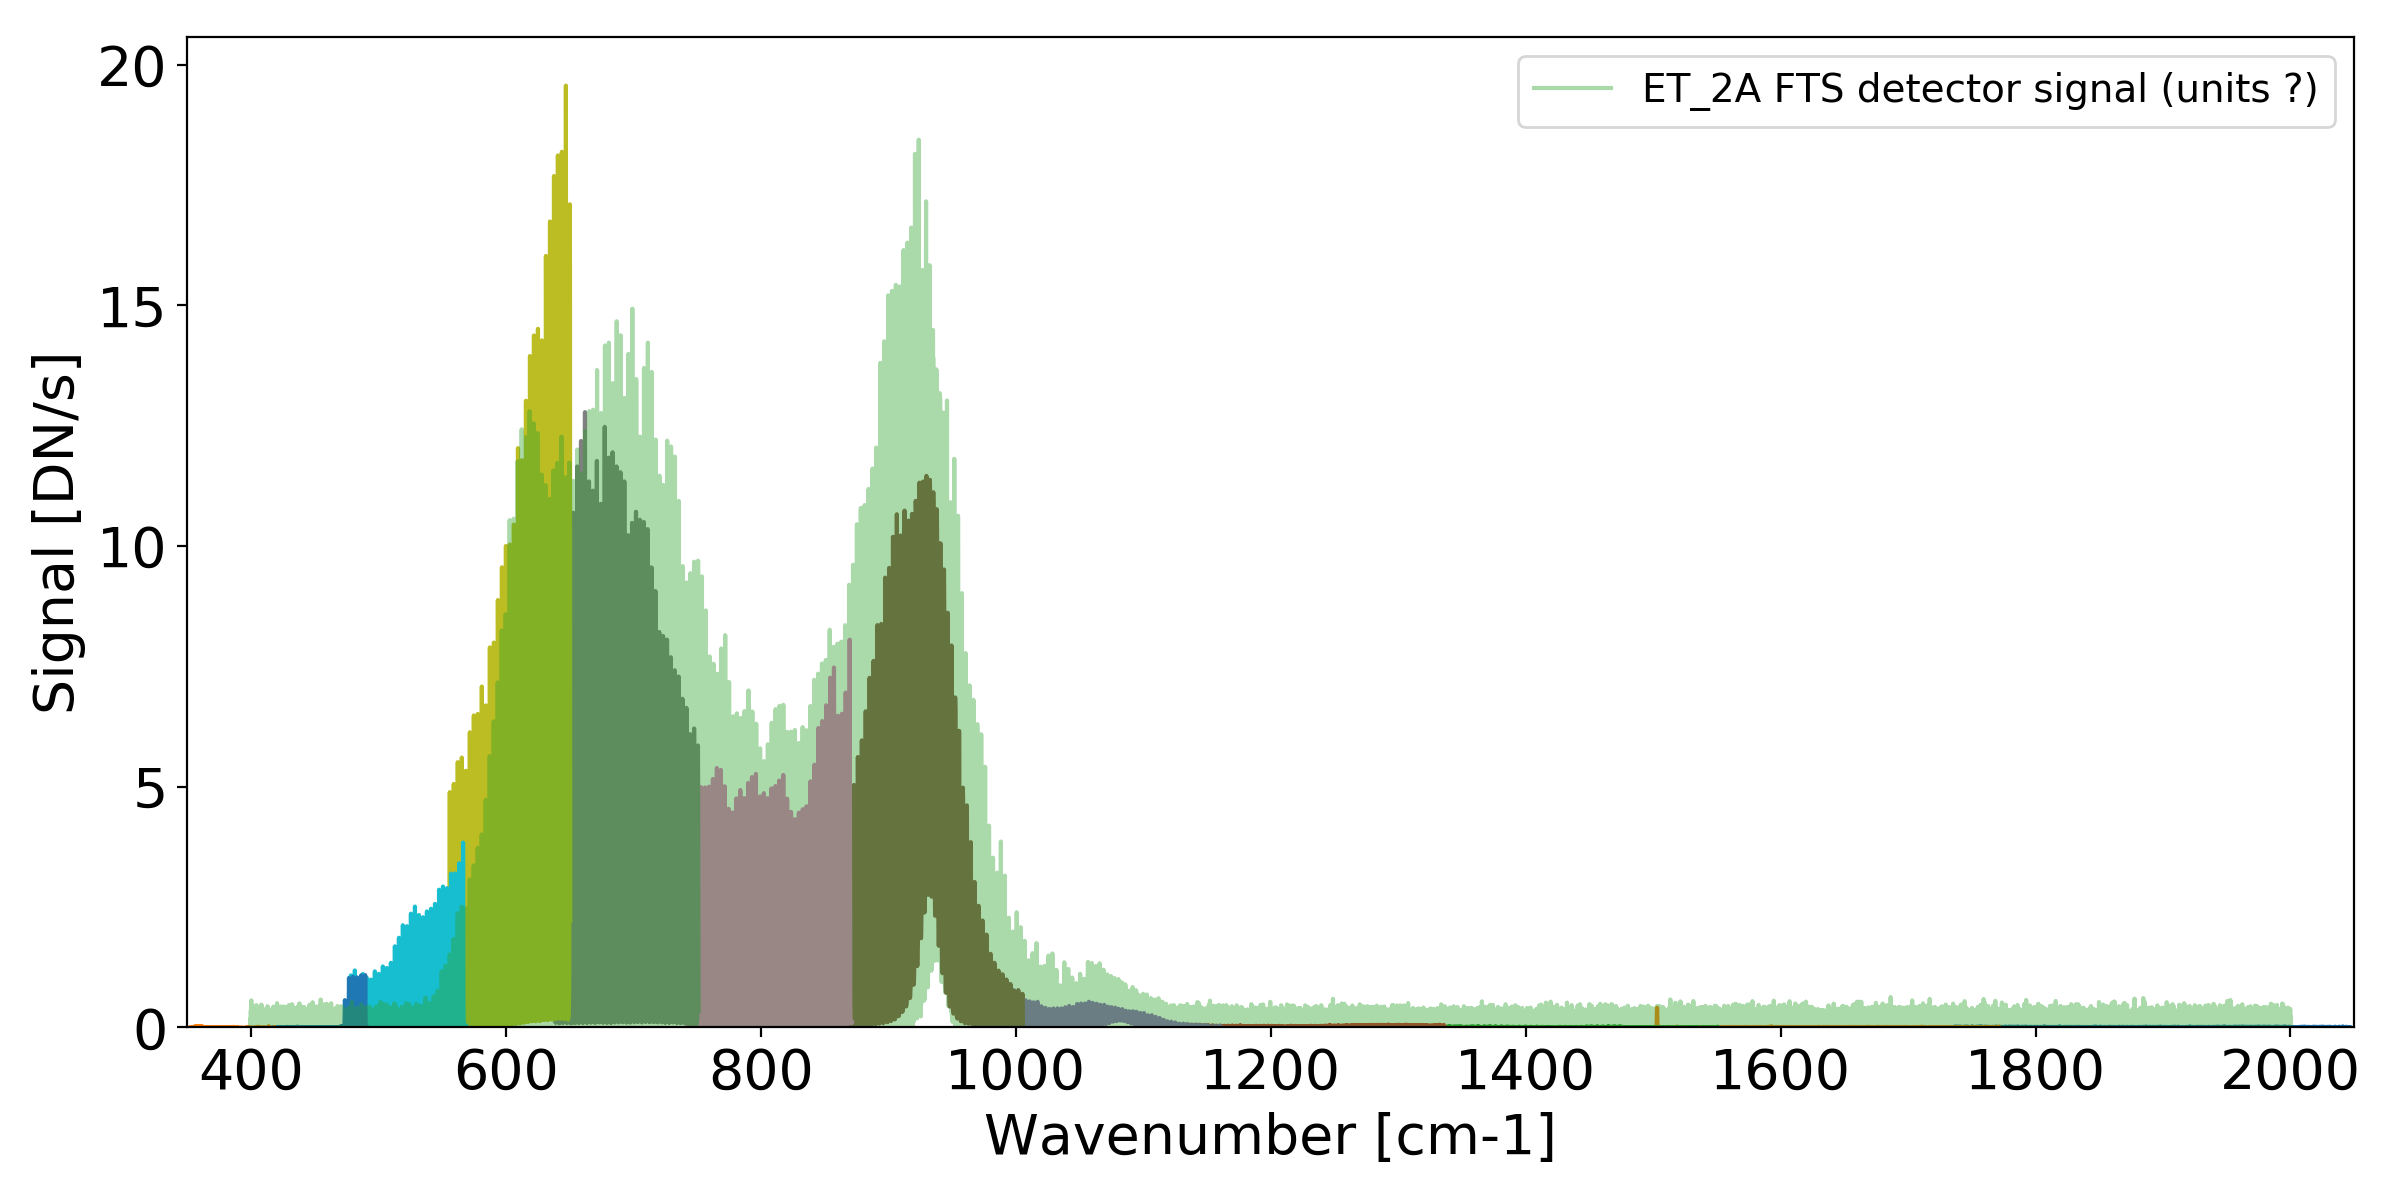

<IPython.core.display.Javascript object>


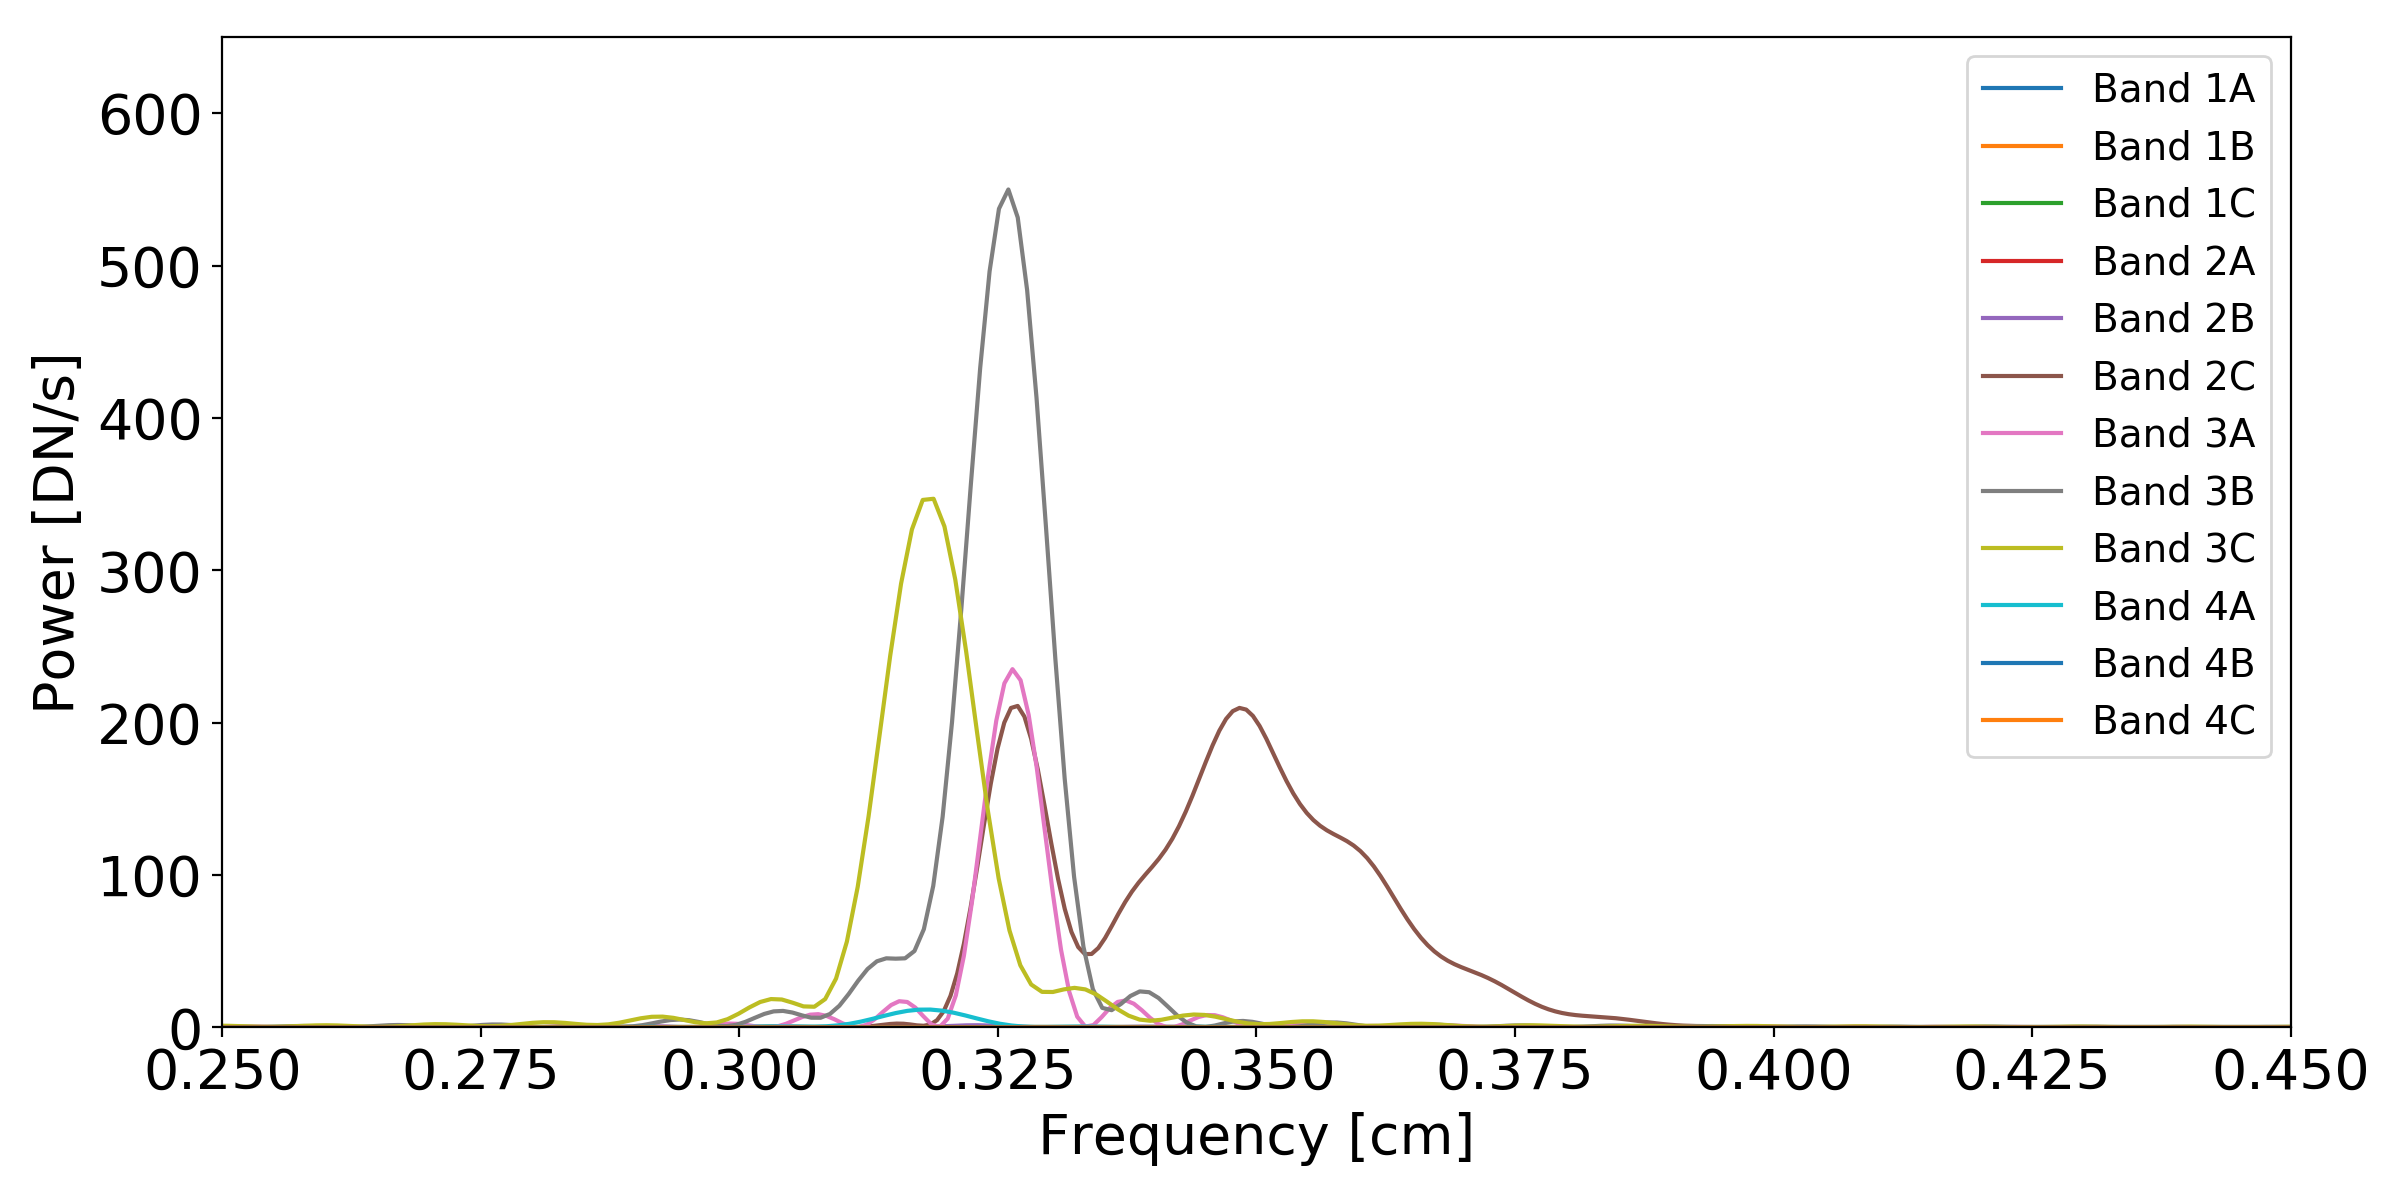

<IPython.core.display.Javascript object>


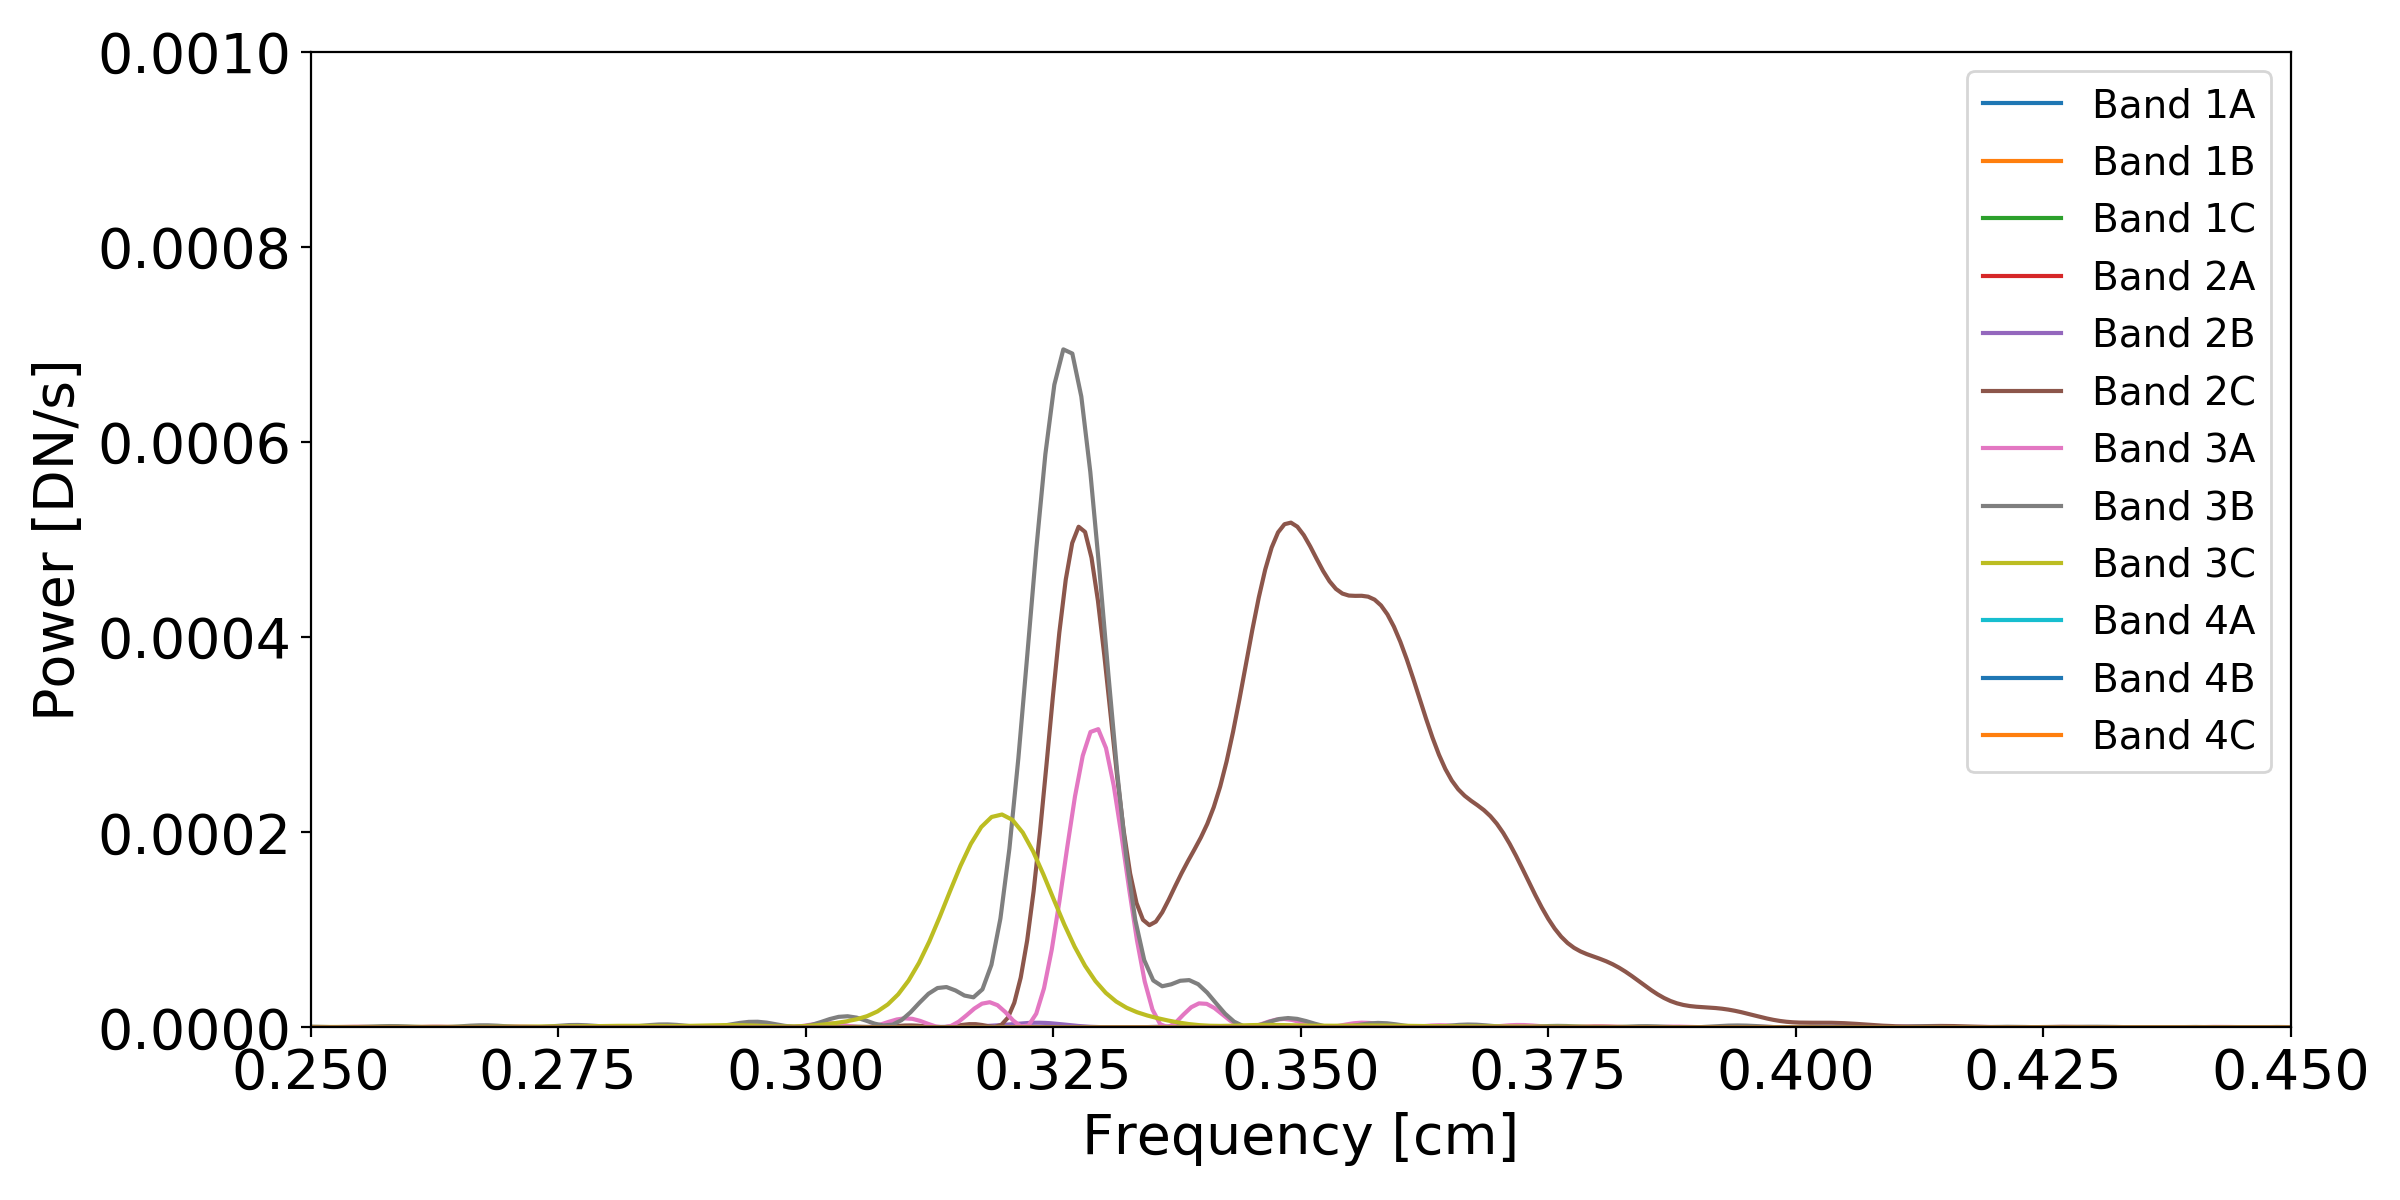

In [42]:
plt.figure(figsize=(12,6))
for band in bands:
    plt.plot(wvnrDic_ET2A[band],signalDic_ET2A[band])
plt.plot(wvnrs2A,etalon2A*600.,alpha=0.4,label='ET_2A FTS detector signal (units ?)')
plt.xlim(350,2050)
plt.ylim(0)
plt.xlabel('Wavenumber [cm-1]',fontsize=20)
plt.ylabel('Signal [DN/s]',fontsize=20)
plt.legend(loc='upper right',fontsize=14)
plt.tick_params(axis='both',labelsize=20)
plt.tight_layout()

plt.figure(figsize=(12,6))
for band in bands:
    plt.plot(freqsDic_ET2A[band][freqsDic_ET2A[band]>0],powerDic_ET2A[band][freqsDic_ET2A[band]>0],label='Band {}'.format(band))
plt.xlim(0.25,0.45)
plt.ylim(0,650)
plt.xlabel('Frequency [cm]',fontsize=20)
plt.ylabel('Power [DN/s]',fontsize=20)
plt.legend(loc='upper right',fontsize=14)
plt.tick_params(axis='both',labelsize=20)
plt.tight_layout()

if FTS_pgram == 'True':
    plt.figure(figsize=(12,6))
    for band in bands:
        plt.plot(freqsDic_ET2A_FTS[band][freqsDic_ET2A_FTS[band]>0],powerDic_ET2A_FTS[band][freqsDic_ET2A_FTS[band]>0],label='Band {}'.format(band))
    plt.xlim(0.25,0.45)
    plt.ylim(0,0.001)
    plt.xlabel('Frequency [cm]',fontsize=20)
    plt.ylabel('Power [DN/s]',fontsize=20)
    plt.legend(loc='upper right',fontsize=14)
    plt.tick_params(axis='both',labelsize=20)
    plt.tight_layout()

<IPython.core.display.Javascript object>


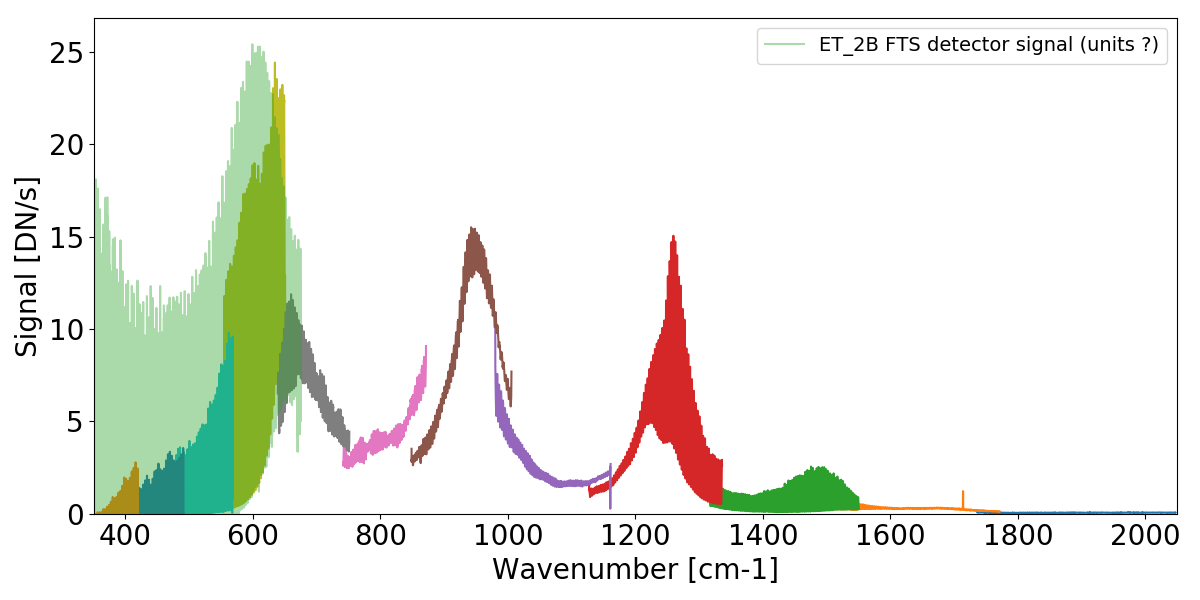

<IPython.core.display.Javascript object>


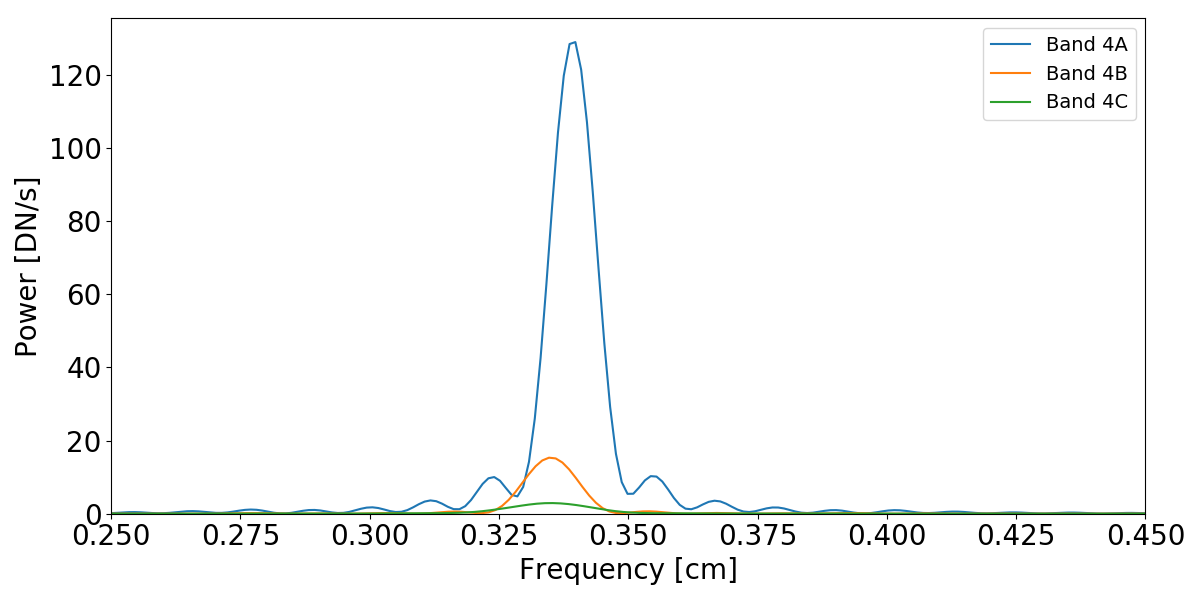

<IPython.core.display.Javascript object>


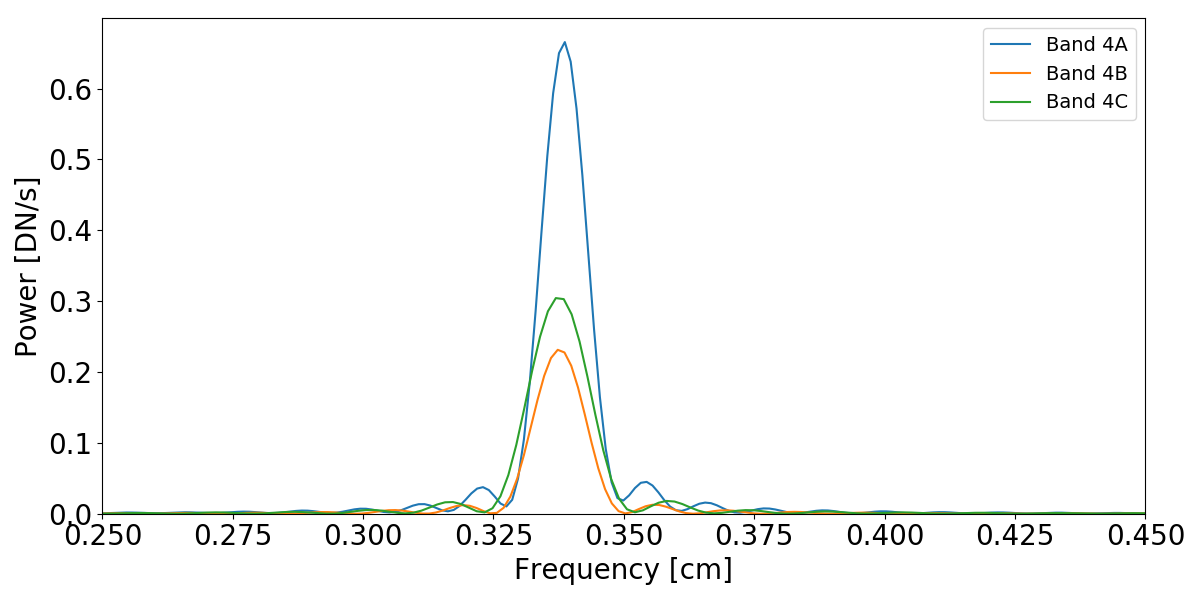

In [24]:
plt.figure(figsize=(12,6))
for band in bands:
    plt.plot(wvnrDic_ET2B[band],signalDic_ET2B[band])
plt.plot(wvnrs2B,etalon2B*50,alpha=0.4,label='ET_2B FTS detector signal (units ?)')
plt.xlim(350,2050)
plt.ylim(0)
plt.xlabel('Wavenumber [cm-1]',fontsize=20)
plt.ylabel('Signal [DN/s]',fontsize=20)
plt.legend(loc='upper right',fontsize=14)
plt.tick_params(axis='both',labelsize=20)
plt.tight_layout()

plt.figure(figsize=(12,6))
for band in bands[-3:]:
    plt.plot(freqsDic_ET2B[band][freqsDic_ET2B[band]>0],powerDic_ET2B[band][freqsDic_ET2B[band]>0],label='Band {}'.format(band))
plt.xlim(0.25,0.45)
plt.ylim(0) # ,3100
plt.xlabel('Frequency [cm]',fontsize=20)
plt.ylabel('Power [DN/s]',fontsize=20)
plt.legend(loc='upper right',fontsize=14)
plt.tick_params(axis='both',labelsize=20)
plt.tight_layout()

if FTS_pgram == 'True':
    plt.figure(figsize=(12,6))
    for band in bands[-3:]:
        plt.plot(freqsDic_ET2B_FTS[band][freqsDic_ET2B_FTS[band]>0],powerDic_ET2B_FTS[band][freqsDic_ET2B_FTS[band]>0],label='Band {}'.format(band))
    plt.xlim(0.25,0.45)
    plt.ylim(0)
    plt.xlabel('Frequency [cm]',fontsize=20)
    plt.ylabel('Power [DN/s]',fontsize=20)
    plt.legend(loc='upper right',fontsize=14)
    plt.tick_params(axis='both',labelsize=20)
    plt.tight_layout()

## Summary:  
Insert summary here

In [20]:
print 0.316138/2
print 0.315744/2
print 0.315916/2
print 0.316087/2
print 0.339756/2
print 0.364101/2
print 0.339444/2

0.158069
0.157872
0.157958
0.1580435
0.169878
0.1820505
0.169722


In [43]:
print 10000./460
print 10000./540

21.7391304348
18.5185185185
